# Packages

In [1]:
using Pkg
using Plots
using Random
using Dates
using DataFrames
using Statistics
using AlphaVantage
using Distributions
using HypothesisTests
using FractionalCalculus
using Downloads
using CSV
using MarketData
using Pandas
using SciPy
using BlockArrays
using LinearAlgebra
using Pkg
using KernelDensity
using Distributions
using MultiKDE
using Optim
using Clustering
using ScikitLearn
@sk_import metrics : silhouette_samples

PyObject <function silhouette_samples at 0x00000000625958B0>

# Include jl file

In [94]:
include("ONC_NCO.jl")
include("Denoising.jl")

optPort

# Snippet 7.1

3.0


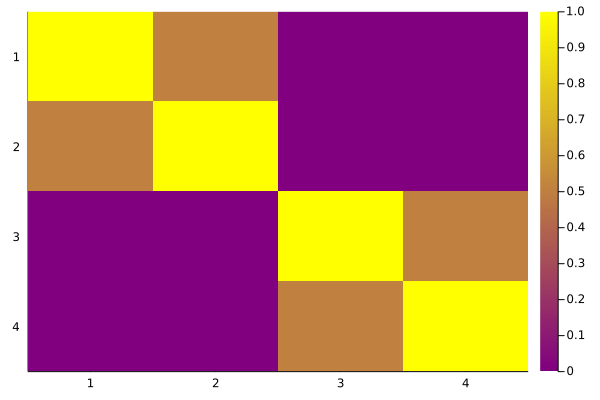

In [26]:
corr0 = formBlockMatrix(2,2,.5)
eigenVal, eigenVec = eigvals(corr0), eigvecs(corr0)
println(maximum(eigenVal)/minimum(eigenVal))
heatmap(corr0, c = cgrad([:purple, :yellow]), yflip = true)

# Snippet 7.2

In [35]:
corr0 = formBlockMatrix(1, 2, .5)
corr1 = formBlockMatrix(1, 2, .0)
len = size(corr0)[1]
corr = BlockArray{Float64}(undef_blocks, repeat([len], 2), repeat([len], 2))
for i in range(1, stop = 2)
    for j in range(1, stop = 2)
        if (i == j) & (i == 1) 
            setblock!(corr, corr0, i, j)
        elseif (i == j) & (i == 2) 
            setblock!(corr, corr1, i, j)
        else
            setblock!(corr, zeros(len, len), i, j)
        end
    end
end
Matrix(corr)
eigenVal, eigenVec = eigvals(corr0), eigvecs(corr0)
println(maximum(eigenVal)/minimum(eigenVal))

3.0


# Snippet 7.3

In [3]:
stocks = Symbol.(["AAPL", "MSFT", "GOOG", "AMZN", "TSLA", "FB", "JPM", "UNH",
"V", "JNJ", "HD", "WMT", "PG", "BAC", "MA", "PFE", "DIS", "AVGO",
"XOM", "ACM", "CSCO", "NFLX", "NKE", "LLY", "KO", "TMO", "CRM", "COST", "AAL", "TWTR"]);

In [9]:
start = DateTime(2020, 1, 1)
All_Stocks = []
for symb in stocks
    data = DataFrames.DataFrame(yahoo(symb, YahooOpt(period1 = start)))
    adj_close_price = data.AdjClose
    if getindex(stocks, 1) == symb
        time_stamp = data.timestamp
        All_Stocks = hcat(time_stamp, adj_close_price)
    else
        All_Stocks = hcat(All_Stocks, adj_close_price)
    end
end
All_Stocks_Prices = DataFrames.DataFrame(All_Stocks, :auto)
All_Stocks_Prices = DataFrames.rename(All_Stocks_Prices, names(All_Stocks_Prices).=>String.(append!([:Dates], stocks)))
CSV.write("Data_Prices.csv", All_Stocks_Prices)

"Data_Prices.csv"

In [6]:
All_Stocks_Prices = CSV.read("Data_Prices.csv", DataFrames.DataFrame)
first(All_Stocks_Prices, 10)

,Dates,AAPL,MSFT,GOOG,AMZN,TSLA,FB,JPM,UNH
,Date,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64
1,2020-01-02,73.7859,156.924,1367.37,94.9005,86.052,209.78,129.899,281.931
2,2020-01-03,73.0686,154.97,1360.66,93.7485,88.602,208.67,128.185,279.078
3,2020-01-06,73.6508,155.371,1394.21,95.144,90.308,212.6,128.083,281.016
4,2020-01-07,73.3044,153.954,1393.34,95.343,93.812,213.06,125.905,279.319
5,2020-01-08,74.4836,156.407,1404.32,94.5985,98.428,215.22,126.888,285.209
6,2020-01-09,76.0657,158.361,1419.83,95.0525,96.268,218.3,127.351,283.589
7,2020-01-10,76.2377,157.628,1429.73,94.158,95.63,218.06,126.081,284.466
8,2020-01-13,77.8664,159.523,1439.23,94.565,104.972,221.91,127.128,275.522
9,2020-01-14,76.815,158.4,1430.88,93.472,107.584,219.06,128.611,277.825


In [ ]:
All_Stocks_Returns = percentChange(All_Stocks_Prices)[1:end, :]
CSV.write("Data_Returns.csv", All_Stocks_Returns)

In [7]:
All_Stocks_Returns = CSV.read("Data_Returns.csv", DataFrames.DataFrame)
All_Stocks_Returns = All_Stocks_Returns[2:end, :]
first(All_Stocks_Returns, 10)

,AAPL,MSFT,GOOG,AMZN,TSLA,FB,JPM
,Float64,Float64,Float64,Float64,Float64,Float64,Float64
1,-0.00972221,-0.0124517,-0.0049072,-0.012139,0.0296332,-0.00529126,-0.0131964
2,0.00796827,0.00258464,0.0246571,0.0148856,0.0192547,0.0188336,-0.000795048
3,-0.00470303,-0.0091178,-0.000624006,0.00209162,0.0388005,0.00216365,-0.0170008
4,0.0160862,0.0159286,0.00788033,-0.00780864,0.0492048,0.010138,0.00780104
5,0.0212408,0.0124929,0.0110445,0.00479918,-0.021945,0.0143109,0.0036514
6,0.00226086,-0.00462714,0.00697268,-0.0094106,-0.00662734,-0.00109943,-0.00996799
7,0.0213644,0.0120243,0.00664461,0.00432257,0.097689,0.0176557,0.00830438
8,-0.0135035,-0.00704308,-0.0058017,-0.0115582,0.0248828,-0.0128431,0.0116619
9,-0.00428544,0.00647633,0.00581457,-0.00396912,-0.0361021,0.00954075,-0.0149854


In [35]:
cov0 = cov(Matrix(All_Stocks_Returns))
cov1 = deNoiseCov(cov0, size(All_Stocks_Returns)[1]/size(All_Stocks_Returns)[2], .01) # de-noise cov
corr1 = covToCorr(cov1)
corr2, clusters, silh, newIdx = clusterKMeansBase(corr1, numberClusters = Int(size(corr1)[1]/2), iterations = 10);

In [36]:
corr2_df = DataFrames.DataFrame(corr2, :auto)
DataFrames.rename!(corr2_df, Symbol.(names(corr2_df)) .=> stocks[newIdx])
insertcols!(corr2_df, 1, :index => stocks[newIdx])

,index,JPM,UNH,V,JNJ,HD,PG,BAC,MA
,Symbol,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64
1,JPM,1.0,0.514148,0.538399,0.507614,0.470263,0.476479,0.583687,0.53747
2,UNH,0.514148,1.0,0.545238,0.497896,0.514197,0.492093,0.512799,0.540935
3,V,0.538399,0.545238,1.0,0.525786,0.5471,0.521573,0.536899,0.572301
4,JNJ,0.507614,0.497896,0.525786,1.0,0.490058,0.473077,0.506457,0.52215
5,HD,0.470263,0.514197,0.5471,0.490058,1.0,0.499416,0.468348,0.540799
6,PG,0.476479,0.492093,0.521573,0.473077,0.499416,1.0,0.474999,0.51679
7,BAC,0.583687,0.512799,0.536899,0.506457,0.468348,0.474999,1.0,0.536026
8,MA,0.53747,0.540935,0.572301,0.52215,0.540799,0.51679,0.536026,1.0
9,PFE,0.448026,0.425559,0.448321,0.414675,0.410398,0.4015,0.447226,0.445882


# Snippet 7.4

In [37]:
wIntra = DataFrames.DataFrame(repeat([0.], 30,2), :auto)
DataFrames.rename!(wIntra, Symbol.(names(wIntra)).=>Symbol.(keys(clusters)))
for i in keys(clusters)
    wIntra[clusters[i], i] .= optPort(cov1[clusters[i], clusters[i]])
end
wIntra

,1,2
,Float64,Float64
1,0.0,0.0203392
2,0.0,0.0661758
3,0.0,-0.0106846
4,0.0,0.0774348
5,0.0,-0.0689937
6,0.0,-0.0513673
7,-0.0403531,0.0
8,0.00538324,0.0
9,-0.0310191,0.0


In [38]:
cov2 = transpose(Matrix(wIntra))*(cov1*Matrix(wIntra)) # reduced covariance matrix

2×2 Matrix{Float64}:
 0.00012769  7.0689e-5
 7.0689e-5   0.000169514

# Snippet 7.5

In [39]:
wInter = DataFrames.DataFrame(weight = vec(optPort(cov2)))

,weight
,Float64
1,0.634202
2,0.365798


In [40]:
weights = DataFrames.DataFrame(weights = vec(sum(Matrix(wIntra) .* Matrix(wInter)', dims = 2)))

,weights
,Float64
1,0.00744005
2,0.024207
3,-0.00390842
4,0.0283255
5,-0.0252378
6,-0.0187901
7,-0.025592
8,0.00341406
9,-0.0196724


# Snippet 7.6

In [57]:
nco = optPortNCO(cov1)
insertcols!(nco, 1, :index => stocks)
nco.weights*=100
nco

,index,weights
,Symbol,Float64
1,AAPL,0.744005
2,MSFT,2.4207
3,GOOG,-0.390842
4,AMZN,2.83255
5,TSLA,-2.52378
6,FB,-1.87901
7,JPM,-2.5592
8,UNH,0.341406
9,V,-1.96724


# Snippet 7.7

In [115]:
nblocks, bsize, bcorr = 10, 50, .5
mu0, cov0 = formTrueMatrix(nblocks, bsize, bcorr);

# Snippet 7.8 - minimumVariance

In [117]:
nObs, nSims, shrink, minVarPortf = 1000, 100, false, true
w1 = DataFrames.DataFrame(zeros(nSims, size(cov0)[1]), :auto)
DataFrames.rename!(w1, names(w1) .=> Symbol.(range(1,stop = size(cov0)[1])))
w1_d = copy(w1)
Random.seed!(0)
for i in 1:nSims
    mu1, cov1 = simCovMu(mu0, cov0, nObs, shrink)
    if minVarPortf
        mu1 = nothing
    end
    w1[i, :] .= optPort(cov1, mu1)
    w1_d[i, :] .= optPortNCO(cov1, μ = mu1, numberClusters = Int(size(cov1)[1]/2)).weights
end

# Snippet 7.9 - minimumVariance

In [118]:
if minVarPortf
    mu_ = nothing
else 
    mu_ = mu0
end
w0 = optPort(cov0, mu_)
w0 = repeat(transpose(w0),size(w1)[1],1) # true allocation
rmsd = mean((Matrix(w1) .- w0).^2)^.5 # RMSE
rmsd_d = mean((Matrix(w1_d) .- w0).^2)^.5 # RMSE
println(rmsd)
println(rmsd_d)

0.008253889041250856
0.004784612178565543


# Snippet 7.8 - Maximum Sharpe Ratio

In [119]:
nObs, nSims, shrink, minVarPortf = 1000, 100, false, false
w1 = DataFrames.DataFrame(zeros(nSims, size(cov0)[1]), :auto)
DataFrames.rename!(w1, names(w1) .=> Symbol.(range(1,stop = size(cov0)[1])))
w1_d = copy(w1)
Random.seed!(0)
for i in 1:nSims
    mu1, cov1 = simCovMu(mu0, cov0, nObs, shrink)
    if minVarPortf
        mu1 = nothing
    end
    w1[i, :] .= optPort(cov1, mu1)
    w1_d[i, :] .= optPortNCO(cov1, μ = mu1, numberClusters = Int(size(cov1)[1]/2)).weights
end

# Snippet 7.9 - Maximum Sharpe Ratio

In [124]:
if minVarPortf
    mu_ = nothing
else 
    mu_ = vcat(mu0...)
end
w0 = optPort(cov0, mu_)
w0 = repeat(transpose(w0),size(w1)[1],1) # true allocation
rmsd = mean((Matrix(w1) .- w0).^2)^.5 # RMSE
rmsd_d = mean((Matrix(w1_d) .- w0).^2)^.5 # RMSE
println(rmsd)
println(rmsd_d)

0.020689955031308205
0.011504007584328657
